In [116]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [117]:
%matplotlib inline

In [118]:
from relaxed.plot_defaults import *

In [119]:
import astropy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import re 
from astropy.table import Table
import astropy.table
import json
from scipy import stats
from copy import deepcopy
import scipy
import warnings

import matplotlib as mpl
from sklearn.model_selection import train_test_split



In [120]:
from relaxed.analysis import setup, get_quantiles, get_am, get_an_from_am, get_ma, get_gradient, \
get_fractional_tdyn, get_savgol_grads, get_tt_indices, add_box_indices, vol_jacknife_err
from relaxed.models import training_suite
from relaxed import halo_catalogs

In [121]:
mah_data = setup('m11', "../../../output/subhalo", cutoff_missing=0.01, cutoff_particle=0.1, min_mass_bin=0.1)
ma = mah_data['ma']
ma_raw = mah_data['ma_raw']
scales = mah_data['scales']

# Investigate num of NaNs

Text(0.5, 1.0, '\\rm Total \\# of haloes: 10,000')

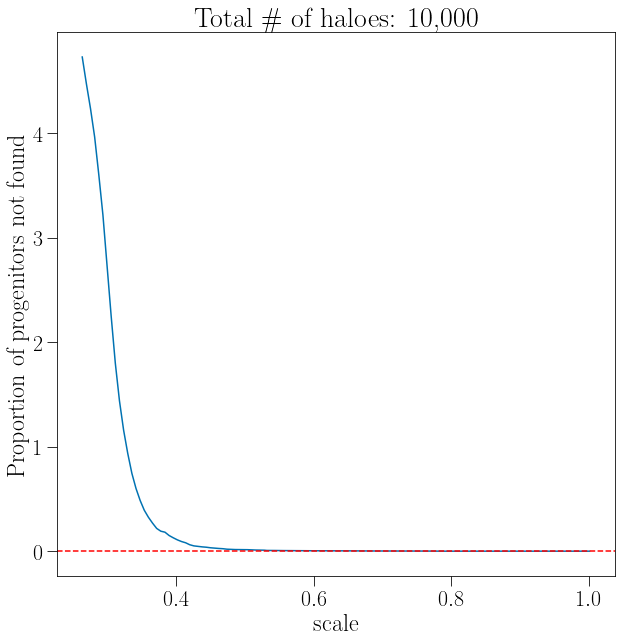

In [23]:
# number of nan's as a function fo scale
plt.figure(figsize=(10,10))
plt.plot(scales, [sum(np.isnan(ma_raw[:, i]))/len(ma) for i in range(len(scales))])
plt.axhline(0.0, color='r', linestyle='--')
plt.xlabel("\\rm scale")
plt.ylabel("\\rm Proportion of progenitors not found")
plt.title("\\rm Total \\# of haloes: 10,000")

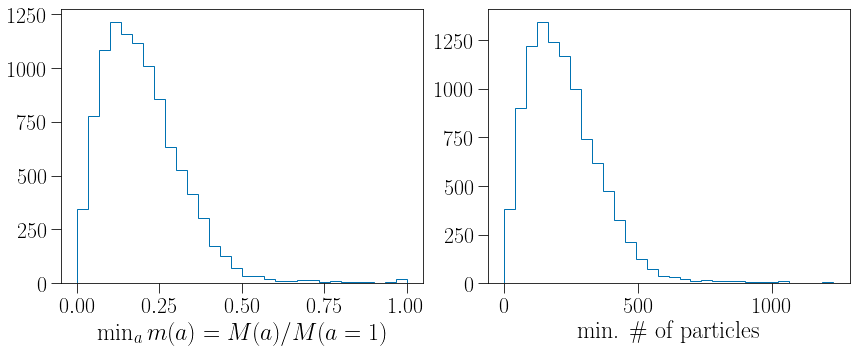

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
_ma_raw = ma_raw.copy()
_ma_raw = _ma_raw.T[mah_data['keep_scale']].T
_ma_raw[np.isnan(_ma_raw)] = 1.35e8 / np.mean(mah_data['cat']['mvir'])

min_ma = np.min(_ma_raw, axis=1)
min_ma_particles = min_ma * mah_data['cat_raw']['mvir'] / 1.35e8

ax1.hist(min_ma, bins=30, histtype='step')
ax1.set_xlabel(r"$\min_{a} m(a) = M(a) / M(a=1)$")

ax2.hist(min_ma_particles, bins=30, histtype='step')
ax2.set_xlabel(r"\rm min. \# of particles")
# ax2.set_xscale('log')

plt.tight_layout()

Text(0.5, 0, '$\\min_{a} m(a) = M(a) / M(a=1)$')

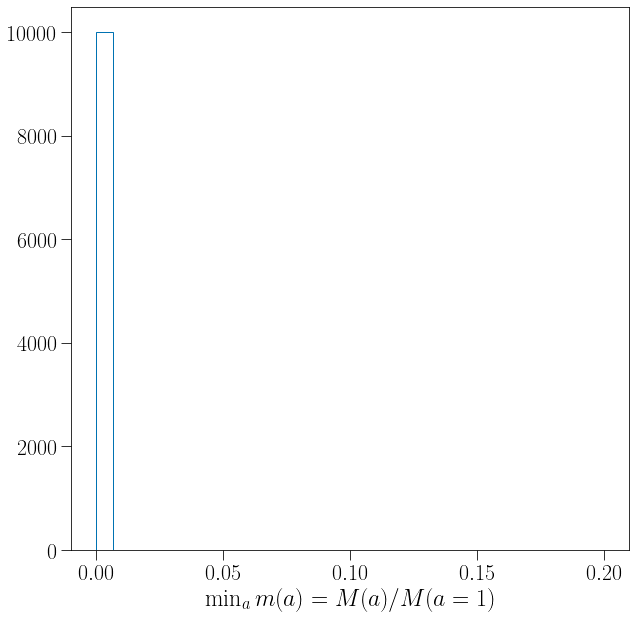

In [40]:
_ma_raw = ma_raw.copy()
_ma_raw[np.isnan(_ma_raw)] = 1.35e8 / np.mean(mah_data['cat']['mvir'])
plt.hist(np.min(_ma_raw, axis=1), bins=30, histtype='step', range=(0, 0.2))
plt.xlabel(r"$\min_{a} m(a) = M(a) / M(a=1)$")

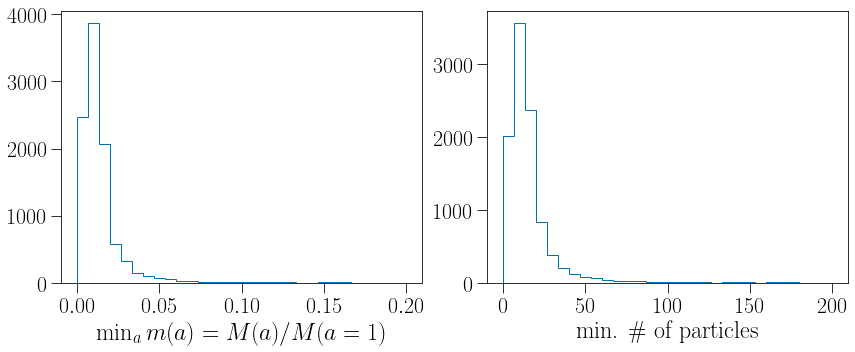

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
_ma_raw = ma_raw.copy()

min_ma = np.nanmin(_ma_raw, axis=1)
min_ma_particles = min_ma * mah_data['cat_raw']['mvir'] / 1.35e8

ax1.hist(min_ma, bins=30, histtype='step', range=(0, 0.2))
ax1.set_xlabel(r"$\min_{a} m(a) = M(a) / M(a=1)$")

ax2.hist(min_ma_particles, bins=30, histtype='step', range=(0, 200))
ax2.set_xlabel(r"\rm min. \# of particles")
# ax2.set_xscale('log')

plt.tight_layout()

# Setup

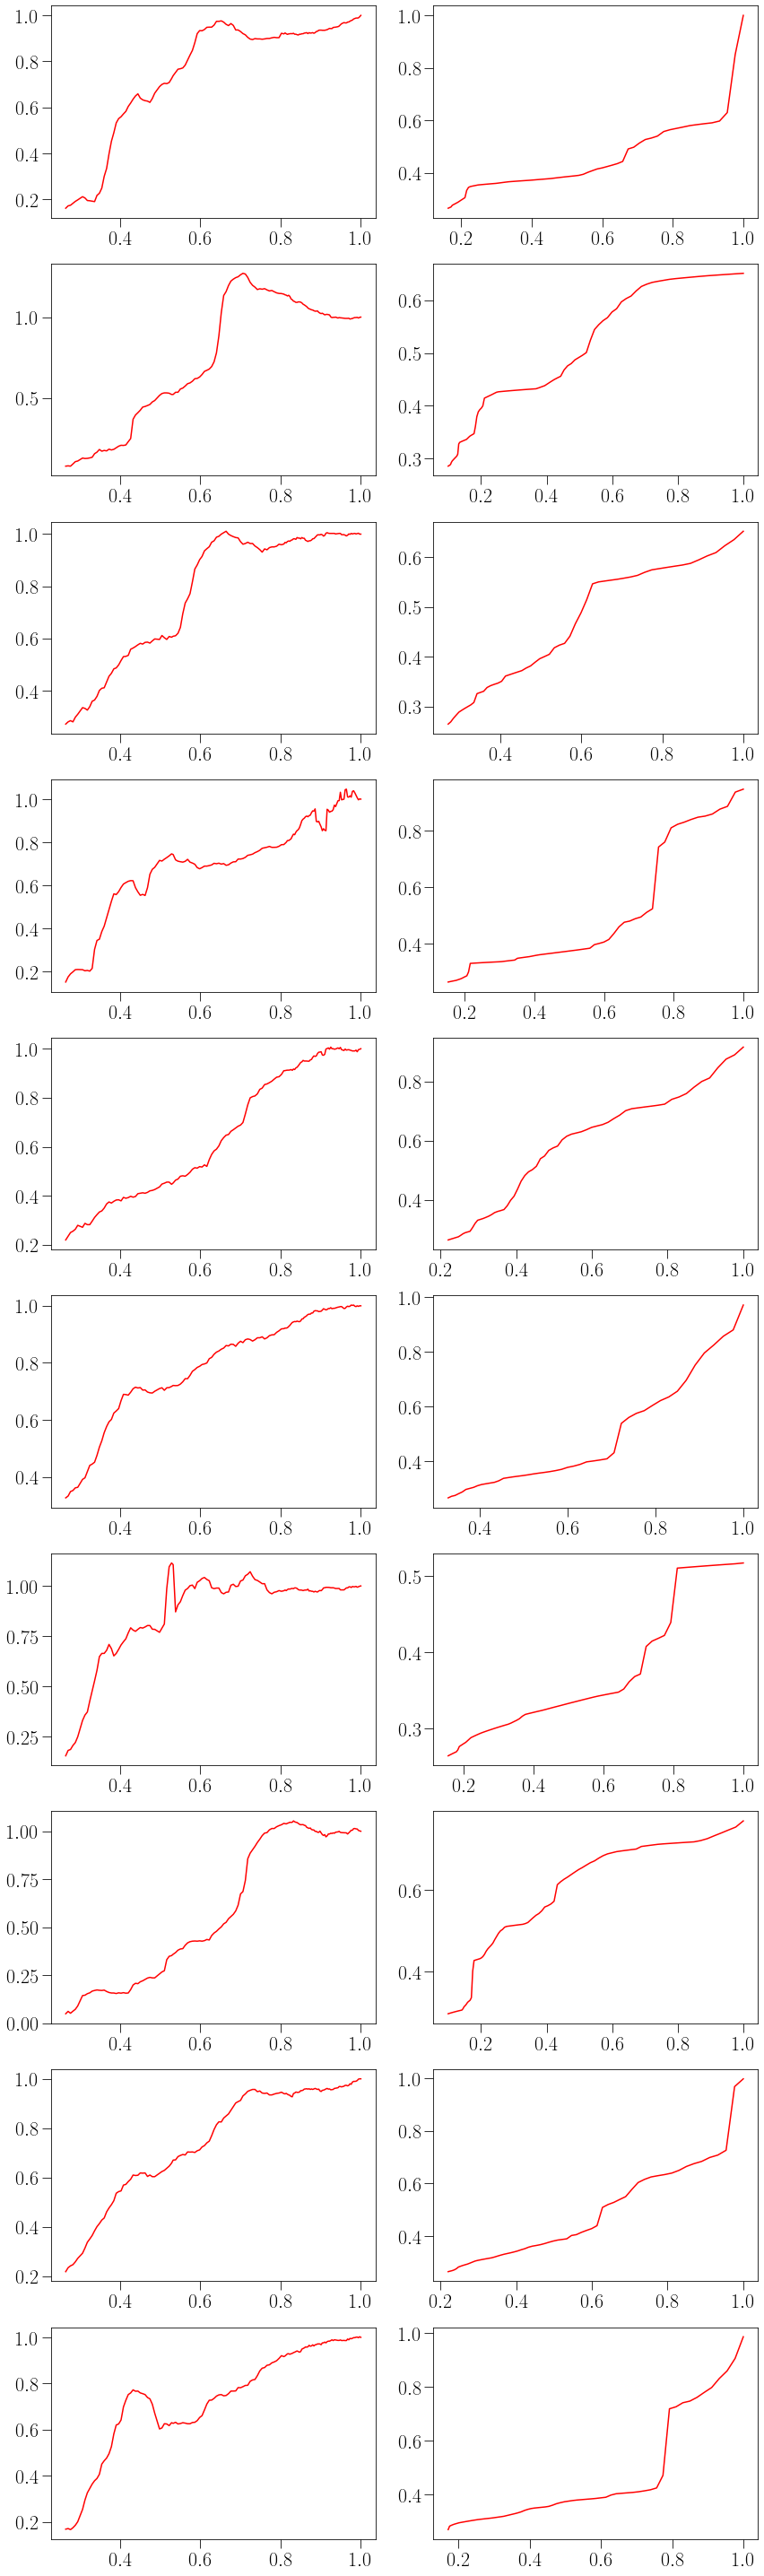

In [17]:
# examples of ma's and  am's 
fig, axes = plt.subplots(10, 2, figsize=(12, 40))
ma, am = mah_data['ma'], mah_data['am']
scales, mass_bins = mah_data['scales'], mah_data['mass_bins']
for i in range(len(axes)):
    idx = np.random.choice(range(len(ma)))
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    ma_i = ma[idx, :]
    am_i = am[idx, :]
    ax1.plot(scales, ma_i, c='r', linestyle='-')
    ax2.plot(mass_bins, am_i, c='r', linestyle='-')
plt.tight_layout()

In [71]:
first_masses = [] 
for i in range(len(ma_raw)):
    first_index = np.where(~np.isnan(ma_raw[i, :]))[0][0]
    first_mass = ma_raw[i, first_index]
    first_masses.append(first_mass)
first_masses = np.array(first_masses)

In [98]:
sum(np.nanmax(ma_raw[:, :25], axis=1) > 1.0)

/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_9936/726817793.py:1: RuntimeWarning: All-NaN slice encountered
  sum(np.nanmax(ma_raw[:, :25], axis=1) > 1.0)


6

/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_9936/1982029077.py:2: RuntimeWarning: All-NaN slice encountered
  for idx in np.where(np.nanmax(ma_raw[:, :25], axis=1) > 0.9)[0]:


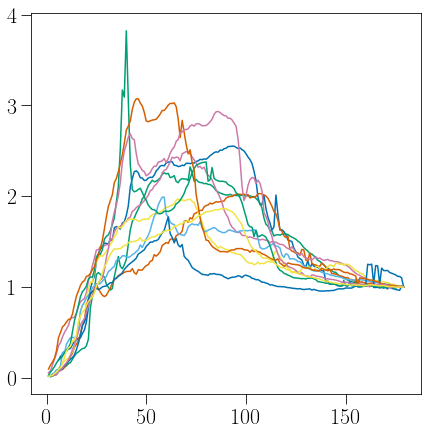

In [107]:
plt.figure(figsize=(7, 7))
for idx in np.where(np.nanmax(ma_raw[:, :25], axis=1) > 0.9)[0]: 
    plt.plot(ma_raw[idx])
    

/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_9936/3440941052.py:2: RuntimeWarning: All-NaN slice encountered
  indices = np.where(np.nanmax(ma_raw[:, :25], axis=1) > 0.9)[0]


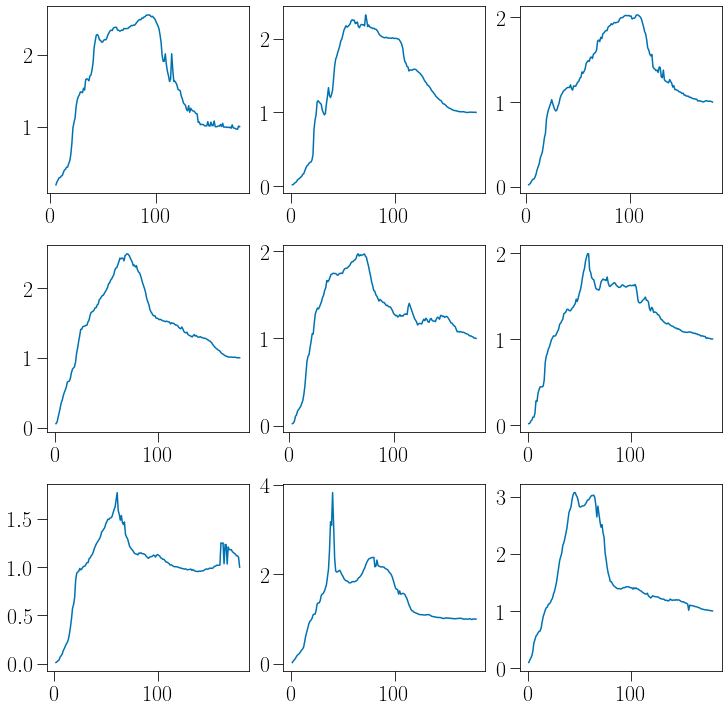

In [115]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
indices = np.where(np.nanmax(ma_raw[:, :25], axis=1) > 0.9)[0]
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.plot(ma_raw[indices[i]])
plt.tight_layout()